In [1]:
using StatsPlots, DataFrames, DataFramesMeta, Dates, MPThemes, XLSX

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1342
┌ Info: Precompiling MPThemes [88f5dd3a-39d1-4901-89fc-1f56524501ef]
└ @ Base loading.jl:1342


In [2]:
raw_data = XLSX.readdata("The_Great_Weight-off.xlsx", "Sheet1", "E2:G344");

In [3]:
data = DataFrame(
    row   = [r for r in 1:length(raw_data[2:end,1])],
    Lukas = raw_data[2:end, 1],
    Miro  = raw_data[2:end, 2],
    Maros = raw_data[2:end, 3]
    );
@transform! data :Date = Dates.Date(Dates.now()) : Day(1) : Dates.Date("2022-12-31");

In [9]:
function predict(m₀,date)
    day1 = Dates.value(Dates.Date("2022-01-24"))
    day = Dates.value(date) - day1 
    return m₀*1.01^(-day/30)
end

predict (generic function with 1 method)

In [10]:
prediction = DataFrame(Date = data.Date[:])
@transform! prediction :Lukas_pred = predict.(data.Lukas[1],data.Date)
@transform! prediction :Miro_pred = predict.(data.Miro[1],data.Date)
@transform! prediction :Maros_pred = predict.(data.Maros[1],data.Date);

In [6]:
my_wong(size = (600,600), 
        formatter = :auto, 
        dpi = 100,
        legend = :topright,
        legendfontsize = 10,
        grid = :on,
        minorticks = :true,
        gridalpha = 0.05,
        xrotation = 60
        )
months = Dates.Date("2022-02") : Month(1) : Dates.Date("2023-01")
xticks = (Dates.value.(months), months );

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1342


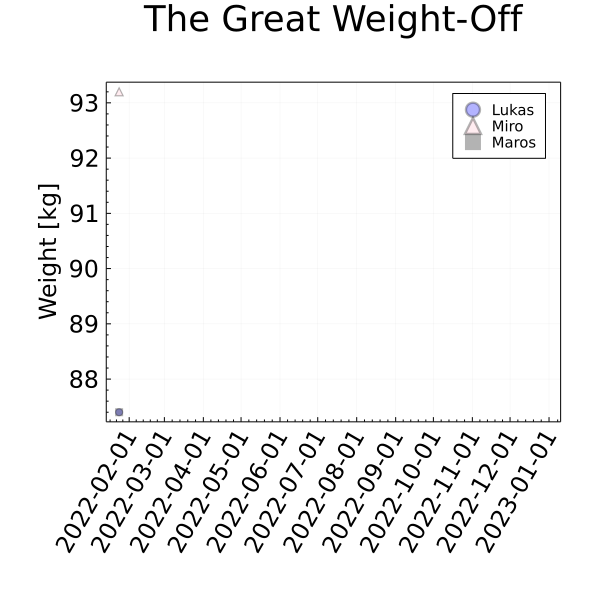

In [7]:
p1 = @df data scatter(:Date, [:Lukas :Miro :Maros], c = [:blue :pink :black], alpha = 0.3,
        marker = [:circle :utriangle :square],
        label  = ["Lukas" "Miro" "Maros"],
        title  = "The Great Weight-Off",
        ylabel = "Weight [kg]",
        xticks = xticks
        )

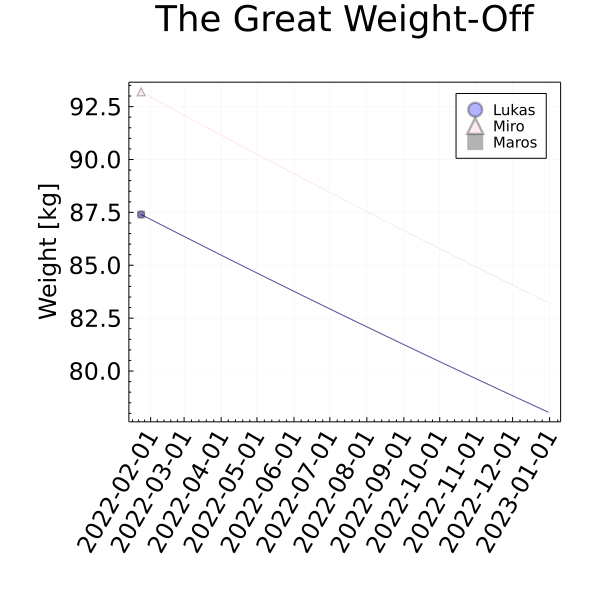

In [8]:
@df prediction plot!( data.Date,
    [:Lukas_pred :Miro_pred :Maros_pred],
    c = [:blue :pink :black],
    alpha = 0.4,
    label = ["" "" ""]
)